## TP8: Hamiltonian systems, boundary value problems

In [2]:
import numpy as np
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.layouts import row, column
from bokeh.models import Legend
import matplotlib.pyplot as plt
from scipy.optimize import root
from matplotlib.pylab import *
plt.rcParams['figure.dpi'] = 300   #quality of the plot 

# Exercise 1: Hamiltonian systems

A system in $\mathbb{R}^2$ is said to be Hamiltonian if it is of the form

$$
\begin{array}{ |ll}
p'(t)=-\cfrac{\partial}{\partial q}\,H(p,q),\\
q'(t)=\cfrac{\partial}{\partial p}\,H(p,q).
\end{array}
$$


The function $H$ is then called the Hamiltonian of the system. Hamiltonian systems are very common. The harmonic oscillator 

$$
(1)\quad\begin{array}{ |ll}
p'(t)=-k^2q,\\
q'(t)=p
\end{array}
$$

is one example for which the corresponding Hamiltonian is $H(p,q)=T(p)+V(q)$, where $T(p)=\frac{1}{2}p^2$ and $V(q)=\frac{1}{2}kq^2$ are respectiely the kinetic and potential energies. 

Hamiltonian systems possess two remarkable properties:

a) The Hamiltonian is constant on trajectories, i.e. that we have

$$
\frac{dH}{dt}(p(t),q(t))=0
$$

when $(p,q)$ solves (1).

b) The corresponding flow is symplectic, i.e. conserves volume and orientation.

Both properties are usually destroyed by a numerical method applied to (1). The goal of this exercise is to propose a scheme which keeps these features at the discrete level.

**Q1. Prove item a) above, i.e. prove that the Hamiltonian is constant on trajectories.**

*Write your answer here.*

In what follows, we work on a particular problem. Consider the system

$$
(2)\quad\begin{array}{ |ll}
p'(t)=-q^3+2q,\\
q'(t)=p.
\end{array}
$$

**Q2. Show that the system (2) is Hamiltonian and give the corresponding Hamiltonian.**

*Write your answer here.*

**Q3. Identify the equilibria of (2) and study their stability.**

*Write your answer here.*

**Q4. Implement the explicit Euler method to solve (2). Compute the three trajectories passing respectively through the points $[0.25,0]^{\top}$, $[0.5,0]^{\top}$, $[0,0.9]^{\top}$ at $t=0$ and display them on a graph with the vector field. On another graph, display the quantity $t_n\mapsto H(p_n,q_n)$ for the trajectory passing through $[0,0.9]$ at $t=0$. Take $t_f = 15$
and $h = 0.01$.** 

**Does the scheme seem to preserve the Hamiltonian, that is do we have $H(p_n,q_n)=cste$?**

**Does the scheme seem to be symplectic, in particular do we have conservation of the volume?**

**Study theoretically the behaviour of $t_n\mapsto \tilde{H}(p_n,q_n)$ in the simpler case where $\tilde{H}(p,q)=\frac{1}{2}(p^2+q^2)$. For this question, $p_n$, $q_n$ stand for the terms of the sequence obtained when implementing the explicit Euler method for the problem associated with $\tilde{H}$.**

In [3]:
def f(t,U):
    p,q = U
    return np.array([0,0])

In [4]:
def euler_explicit(f, t0, tf, h, U0):
    
    nt = int(round((tf-t0)/h))+1 #number of column of the output array
    nt+= int(tf-(t0+(nt-1)*h)>1e-9) #in case tf-t0 is not a multiple of h
    t = t0

    U0_array = np.array(U0)
    neq = U0_array.size

    U = np.zeros((neq, nt))
    U[:,0] = U0_array
    
    it = 0
    while t+h<=tf:
        U[:,it+1] = U[:,it]  #to modify here
        t += h
        it+=1
    return U

In [5]:
def H(p,q):    
    return 0 #to modify here

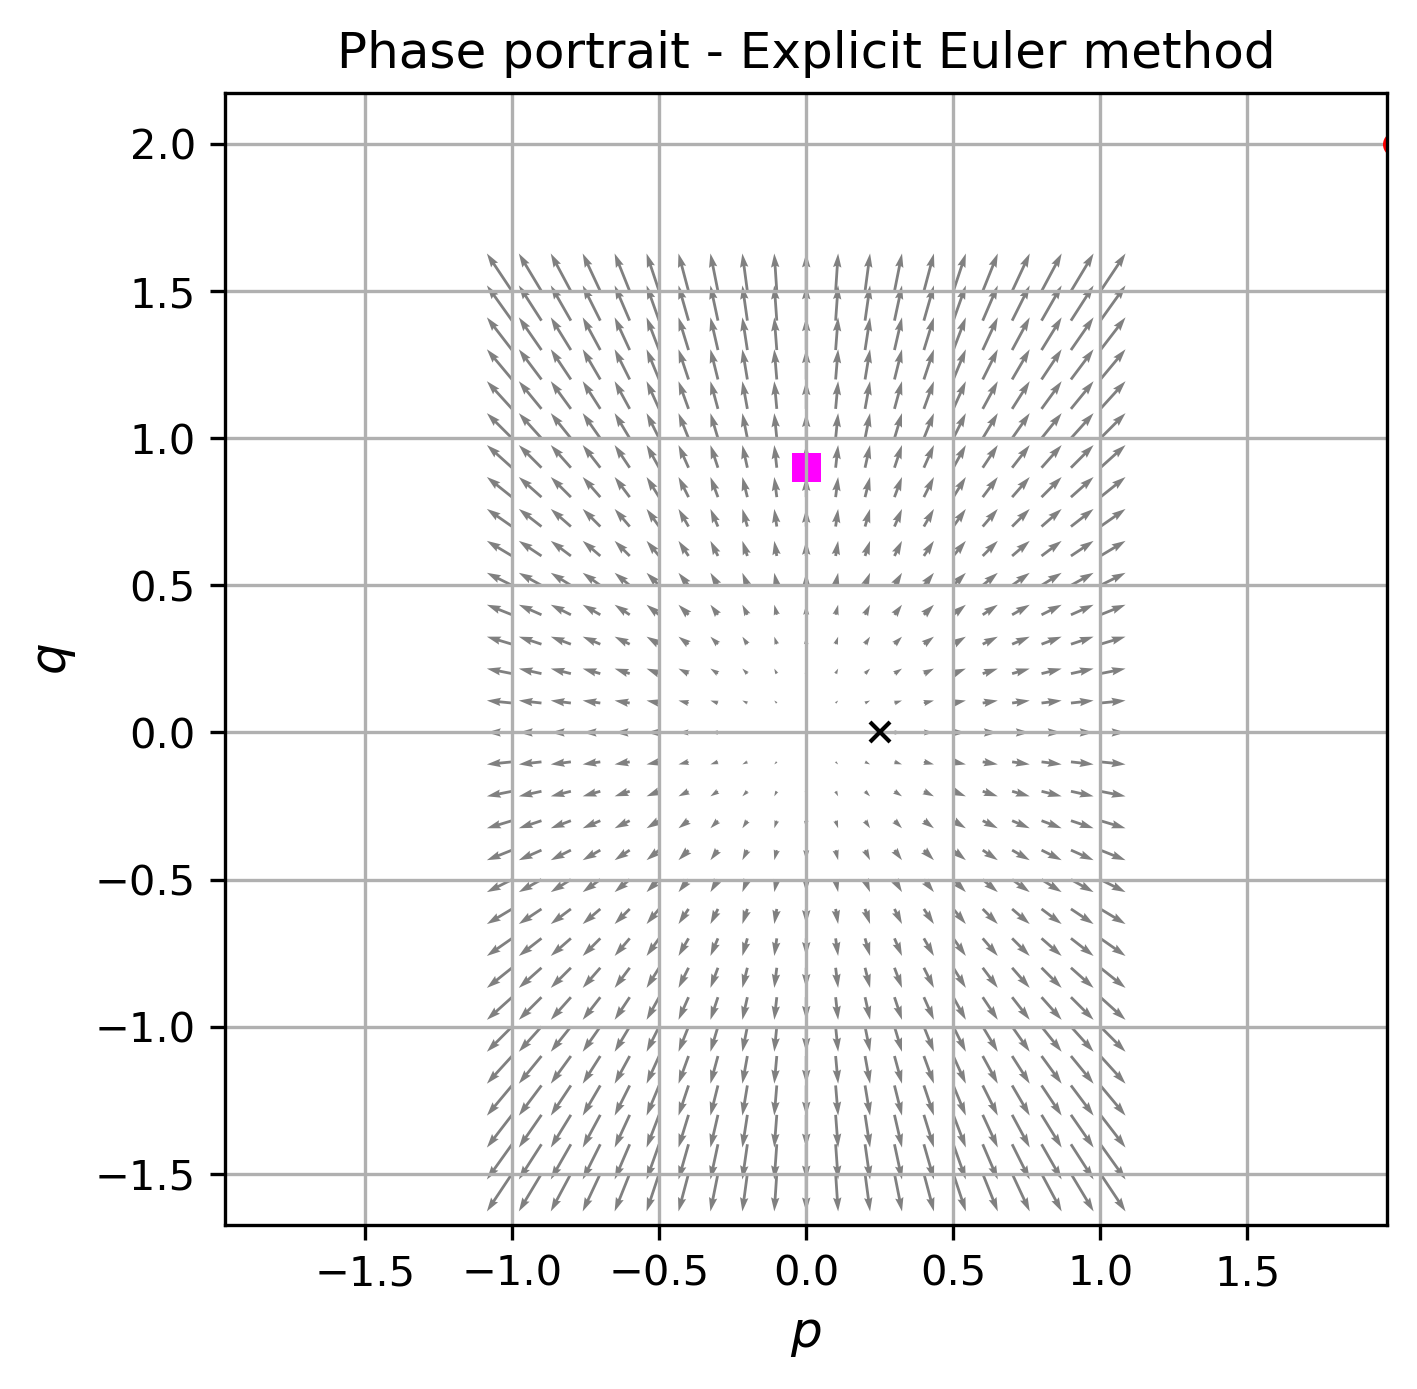

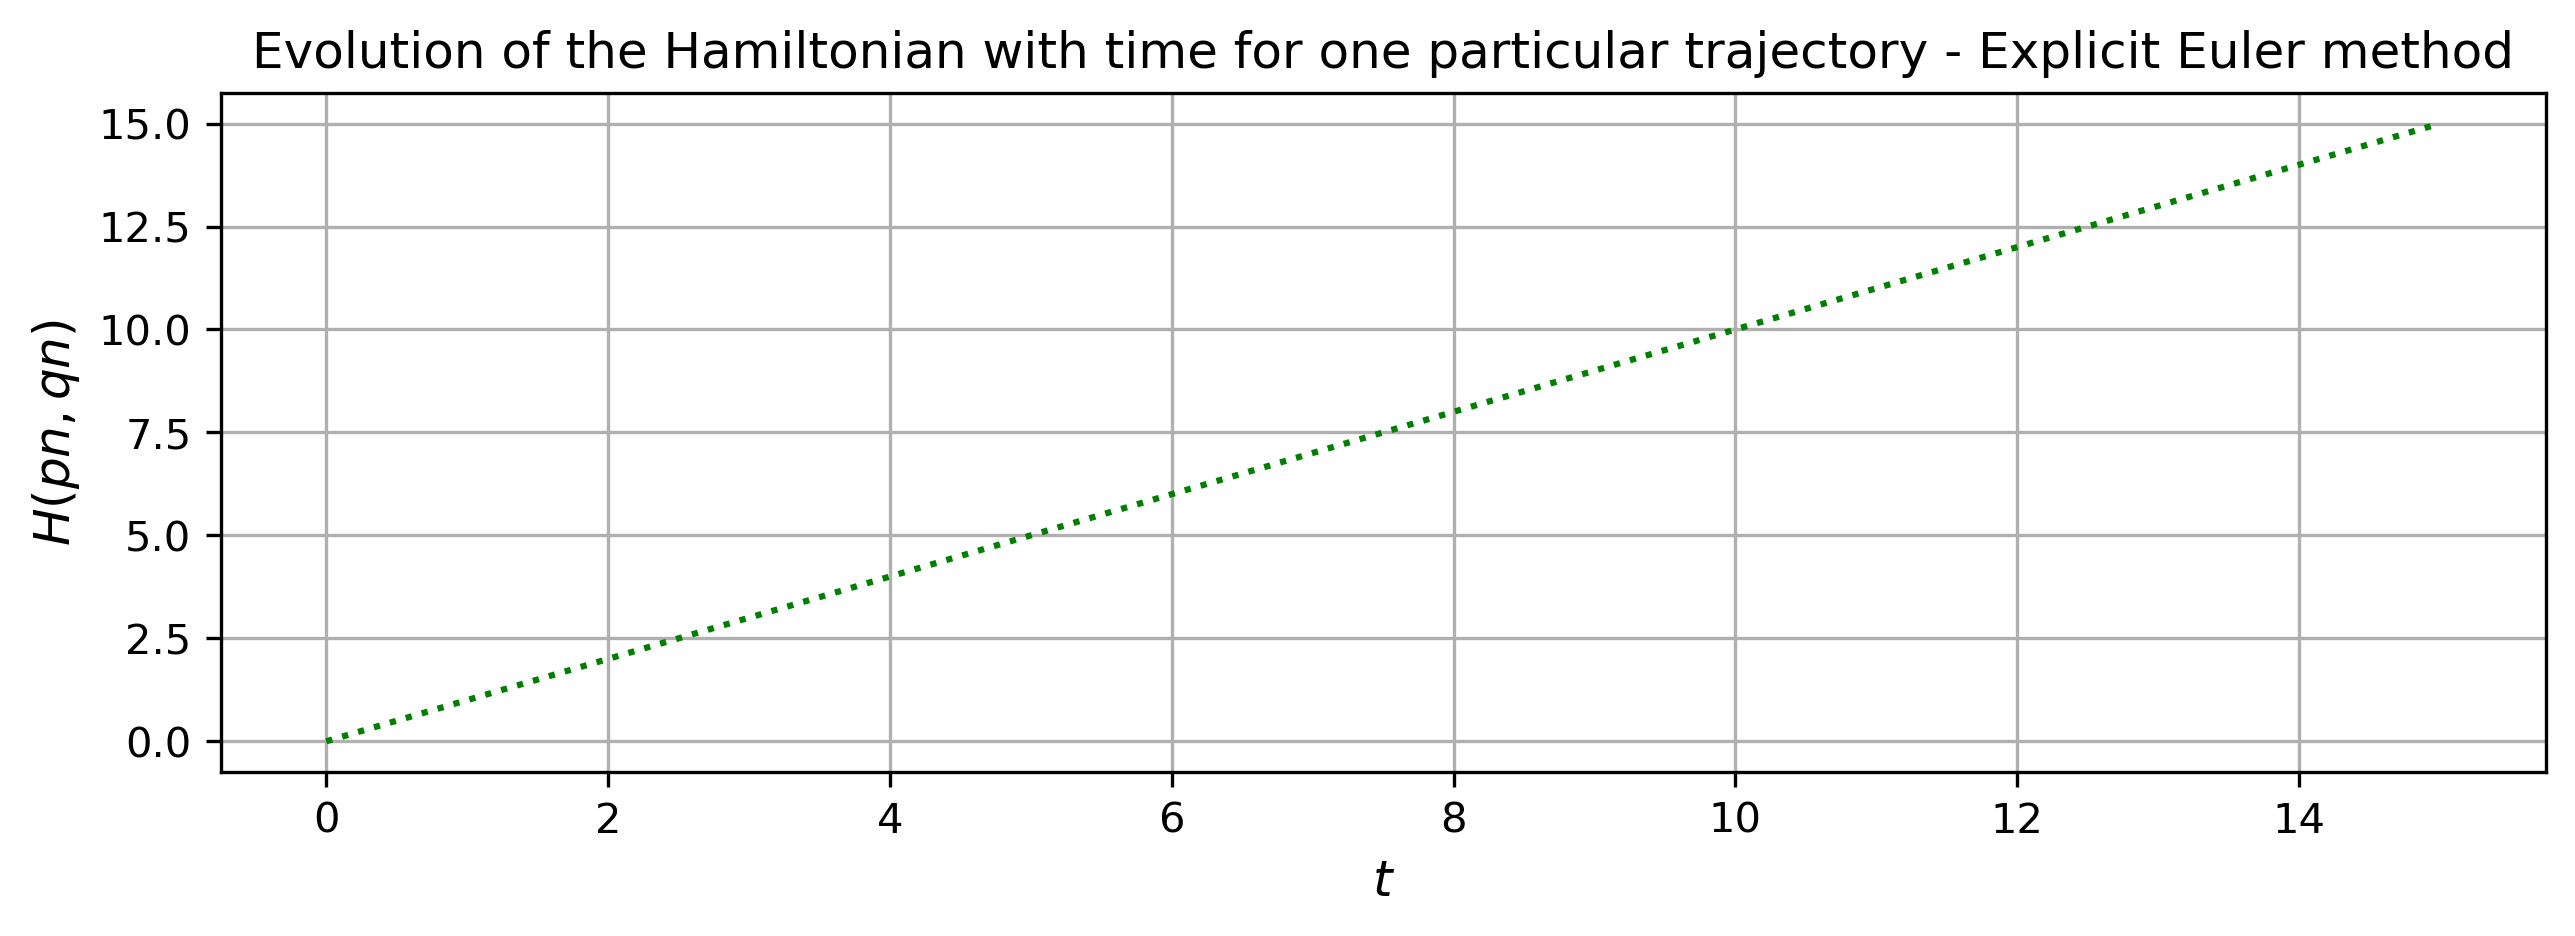

In [6]:
from matplotlib.patches import Polygon
t0 = 0.
tf = 15
h = 0.01

# equilibria of the system
p_equilibrium=[2] #to modify here 
q_equilibrium=[2]

plt.rcParams['figure.figsize'] = [5,5]
# we display a few trajectories
p_starting=[0.25] #to modify here 
q_starting=[0]
fig, (ax) = plt.subplots(1, 1)
for i in range(len(p_starting)):    
    p, q = euler_explicit(f, t0, tf, h, [p_starting[i],q_starting[i]]) #to modify here
    plt.plot(p, q)
    plot(p_starting,q_starting,'x',ms=5,color='black')

# we display the transformation of a square to study the symplecticity of the scheme
r=0.05   # half side of the square
p_square_Start=[-r,r,r,-r] 
q_square_Start=[0.9-r,0.9-r,0.9+r,0.9+r]
p_square = np.empty(len(p_square_Start), dtype=object) 
q_square = np.empty(len(p_square_Start), dtype=object) 
for i in range(len(p_square_Start)):     
    p_square[i], q_square[i] = euler_explicit(f, t0, tf, h, [p_square_Start[i],q_square_Start[i]])

choice_time=[0,400,800,1200]       
for i in range(len(choice_time)):  
    ind=choice_time[i]    
    points = np.array([[p_square[0][ind],q_square[0][ind]],[p_square[1][ind],q_square[1][ind]],[p_square[2][ind],q_square[2][ind]],[p_square[3][ind],q_square[3][ind]]])
    poly = Polygon(points, facecolor = 'magenta')    
    ax.add_patch(poly)

# we construct the vector field
P,Q = meshgrid(linspace(-1,1,21),linspace(-1.5,1.5,31))
tt    = linspace(0,0.2,201)
VP,VQ = [0,0] # to modify here
r = sqrt(P**2+Q**2) # to modify here
quiver(P, Q, P, Q,color='gray') # to modify here
plot(p_equilibrium,q_equilibrium,'o',ms=5,color='red')
grid()
plt.xlabel(u'$p$', fontsize=12)
plt.ylabel(u'$q$', fontsize=12)
#plt.ylim(-1.5, 1.5)
plt.axis('equal')
plt.xlim(-1, 1)
plt.title('Phase portrait - Explicit Euler method')
plt.show()

# Evolution of the Hamiltonian on a particular trajectory
plt.rcParams['figure.figsize'] = [10,3]
p, q=euler_explicit(f, t0, tf, h, [0,0.9])
t = np.linspace(t0,tf,len(p))
plot(t,t,":",color = 'green',ms=4) #to modify here
grid()
plt.xlabel(u'$t$', fontsize=12)
plt.ylabel(u'$H(pn,qn)$', fontsize=12)
plt.title('Evolution of the Hamiltonian with time for one particular trajectory - Explicit Euler method')
plt.show()

**Q5. What is the main drawback of the implicit Euler method compare to the explicit one?**

**To study long time behavours, what is its avantage?**

**Implement the implicit Euler method to solve (2). Again, compute the three trajectories passing respectively through the points $[0.25,0]^{\top}$, $[0.5,0]^{\top}$, $[0,0.9]^{\top}$ at $t=0$ and display them on a graph with the vector field. On another graph, display the quantity $t_n\mapsto H(p_n,q_n)$ for the trajectory passing through $[0,0.9]$ at $t=0$.** 

**Does the scheme seem to preserve the Hamiltonian?**

**Does the scheme seem to be symplectic?**

In [7]:
print('Write your code here')

Write your code here


From the results obtained with the explicit and implicit Euler methods, it is natural to try to combine the two approaches. Write $f(p,q)=[f_p(p,q),f_q(p,q)]^{\top}$ and consider the scheme

$$
\begin{array}{|ll}
p_{n+1}=p_n+h f_p(p_n,q_n) & \mbox{Explicit Euler} \\
q_{n+1}=q_n+h f_q(p_{n+1},q_{n+1}) & \mbox{Implicit Euler}.
\end{array}
$$

This is called the symplectic Euler method. 

**Q6. Implement the symplectic Euler method to solve (2). Again, compute the three trajectories passing respectively through the points $[0.25,0]^{\top}$, $[0.5,0]^{\top}$, $[0,0.9]^{\top}$ at $t=0$ and display them on a graph with the vector field. On another graph, display the quantity $t_n\mapsto H(p_n,q_n)$ for the trajectory passing through $[0,0.9]$ at $t=0$.** 

**Comment your results.**

In [8]:
print('Write your code here')

Write your code here


Let us consider a last method to solve Hamiltonian systems called the Störmer–Verlet Method. It is defined by the scheme

$$
\begin{array}{|ll}
p_{n+\frac{1}{2}}=p_n+\frac{h}{2} f_p(p_n,q_n) & \mbox{Explicit Euler} \\
q_{n+\frac{1}{2}}=q_n+\frac{h}{2} f_q(p_{n+\frac{1}{2}},q_{n+\frac{1}{2}}) & \mbox{Implicit Euler}\\
q_{n+1}=q_{n+\frac{1}{2}}+\frac{h}{2} f_q(p_{n+\frac{1}{2}},q_{n+\frac{1}{2}}) & \mbox{Explicit Euler}\\
p_{n+1}=p_{n+\frac{1}{2}}+\frac{h}{2} f_p(p_{n+1},q_{n+1}) & \mbox{Implicit Euler}. 
\end{array}
$$

Note that for our particular problem, lines 2 and 3 above can be gathered into $q_{n+1}=q_n+hp_{n+\frac{1}{2}}$.

**Q7. Implement the Störmer–Verlet Method to solve (2). Again, compute the three trajectories passing respectively through the points $[0.25,0]^{\top}$, $[0.5,0]^{\top}$, $[0,0.9]^{\top}$ at $t=0$ and display them on a graph with the vector field. On another graph, display the quantity $t_n\mapsto H(p_n,q_n)$ for the trajectory passing through $[0,0.9]$ at $t=0$.** 

**Comment your results.**

**Study theoretically the behaviour of $t_n\mapsto \tilde{H}(p_n,q_n)$ in the simpler case where $\tilde{H}(p,q)=\frac{1}{2}(p^2+q^2)$. For this question, $p_n$, $q_n$ stand for the terms of the sequence obtained when implementing the Störmer–Verlet method for the problem associated with $\tilde{H}$.**

In [9]:
print('Write your code here')

Write your code here


# Exercise 2: the shooting method for boundary value problems

Although this course is mainly concerned with initial value problems, we study in this exercise a method to deal with boundary value problems. 

A simple example of such problems is the following

$$
(1)\quad\begin{array}{ |ll}
-y''(x)+y(x)=f(x)\quad \mbox{on }I:=(0;1)\\
y(0)=0,\quad y(1)=0.
\end{array}
$$

We emphasize that above we impose conditions at the boundary of the domain $I$ and not initial conditions which would write for example $y(0)=a$, $y'(0)=b$ for some given $a$, $b\in\mathbb{R}$. This small change leads to very different properties for the problem and therefore for the analysis. In particular Cauchy-Lipschitz theorem can no longer be used and questions of existence and uniqueness of the solution are much more complicated.

For the linear problem (1), rather elementary arguments can still be used. Assume that $f\in\mathscr{C}^{0}(\overline{I})$ and let us look for a solution in $\mathscr{C}^{2}(\overline{I})$.

**Q1. i) Uniqueness of the solution.** Assume that $y_1$, $y_2$ solve (1) and set $e:=y_1-y_2$. **Multiplying the problem satisfied by $e$ by a well chosen function and integrating by parts on $I$, show that $e\equiv0$.**

*Write your answer here.*

**ii) Existence of a solution.** Introduce the function $y_f\in\mathscr{C}^{2}(\overline{I})$ such that 

$$
\quad\begin{array}{ |ll}
-y_f''(x)+y_f(x)=f(x)\quad \mbox{on }I\\
y_f(0)=0,\quad y_f'(0)=0.
\end{array}
$$

Let us look for a solution of (1) with the decomposition $y=y_f+u$. **Write the problem $(P_u)$ satisfied by $u$.** Introduce the function $v\in\mathscr{C}^{2}(\overline{I})$ such that 

$$
\quad\begin{array}{ |ll}
-v''(x)+v(x)=0\quad \mbox{on }I\\
v(0)=0,\quad v'(1)=1.
\end{array}
$$ 

**Explain why we have $v(1)\ne0$. Show that $(P_u)$ admits a solution which can be simply expressed with $v$. Conclude.**

*Write your answer here.*

Let us now consider the following non linear problem

$$
(2)\quad \begin{array}{ |ll}
y''(x)=e^{y(x)/2}\quad\mbox{ on }I\\
y(0)=a,\qquad y(1)=b
\end{array}
$$

where $a$, $b\in\mathbb{R}$ are given. In order to establish existence theorems or to do numerical computations, we can proceed as follows: solve the initial value problem 

$$
(3)\quad \begin{array}{ |ll}
y_\eta''(x)=e^{y_\eta(x)/2}\quad\mbox{ on }I\\
y_\eta(0)=a,\qquad y_\eta'(0)=\eta
\end{array}
$$

with some guess $\eta\in\mathbb{R}$ and check whether the computed value $y_\eta(1)$ is equal to $b$ or not. Then our problem is to know whether the function of the single variable $\eta$

$$
\mathscr{F}(\eta)=y_\eta(1)-b
$$

has a zero or not. The root of $\mathscr{F}$ can be computed by different iterative methods and for simple problems as above, by a simple dialogue with the computer. This method is very commonly used and is called *the shooting method*.

**Q2. Use the RK4 scheme to solve problem (3) for $a=1$ and a given $\eta\in\mathbb{R}$. Display the solutions for 10 different values of $\eta\in[-2;0]$.**

In [10]:
print('Write your code here')

Write your code here


**Q3. Solve the problem (2) for $a=1$, $b=1/2$. Give the corresponding value of $\eta$ as well as the error on the right boundary condition.** Note that to identify the zero(s) of $\mathscr{F}$, the simplest method will be accepted.

In [13]:
print('Write your code here')

Write your code here


**Q4. Use the shooting method of Q2-Q3 to solve the problem**

$$
\begin{array}{ |ll}
y''(x)=-e^{y(x)/2}\quad\mbox{ on }I=(0;1)\\
y(0)=1,\qquad y(1)=b
\end{array}
$$

**for different values of $b\in[0;20]$. What is the difference for this problem compare to (2)?**


In [12]:
print('Write your code here')

Write your code here
